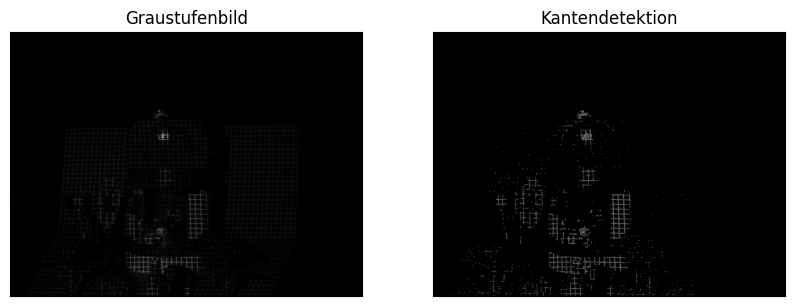

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bild einlesen
img = cv2.imread('../../02_Utils/Images/lasertestv2-rechts.png')

# Bild in Graustufen umwandeln
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Kanten mit dem Canny-Algorithmus detektieren
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Kanten anzeigen
plt.figure(figsize=(10, 6))
plt.subplot(121), plt.imshow(gray, cmap='gray')
plt.title('Graustufenbild'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Kantendetektion'), plt.xticks([]), plt.yticks([])
plt.show()

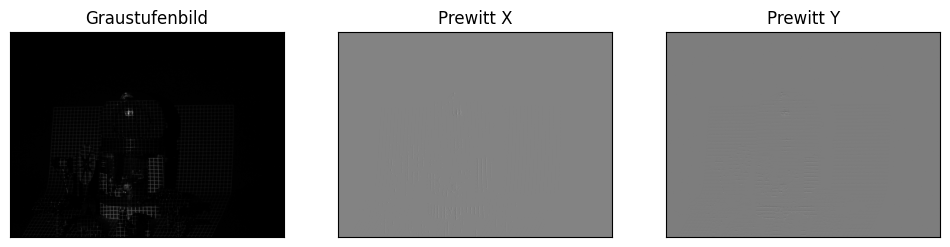

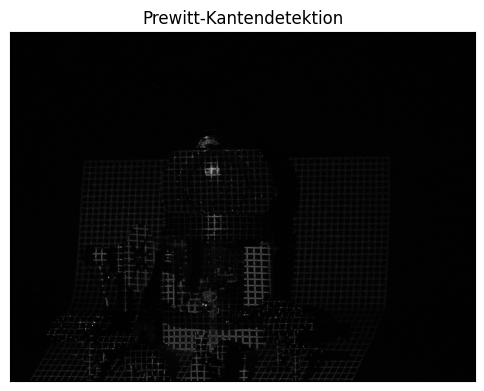

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bild einlesen
img = cv2.imread('../../02_Utils/Images/lasertestv2-rechts.png')
# Bild in Graustufen umwandeln
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Prewitt-Filter definieren
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

# Filter anwenden
grad_x = cv2.filter2D(gray, cv2.CV_64F, prewitt_kernel_x)
grad_y = cv2.filter2D(gray, cv2.CV_64F, prewitt_kernel_y)

# Gradientenbilder kombinieren
magnitude = np.sqrt(grad_x**2 + grad_y**2)
magnitude = cv2.convertScaleAbs(magnitude)

# Ergebnisse anzeigen
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(gray, cmap='gray')
plt.title('Graustufenbild'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(grad_x, cmap='gray')
plt.title('Prewitt X'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(grad_y, cmap='gray')
plt.title('Prewitt Y'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(magnitude, cmap='gray')
plt.title('Prewitt-Kantendetektion'), plt.xticks([]), plt.yticks([])
plt.show()

Horizontale Gradienten (Prewitt X):
[[ 0.  3. 11. ... 10. 12.  0.]
 [ 0.  5.  5. ... 11. 13.  0.]
 [ 0.  6.  2. ...  7.  7.  0.]
 ...
 [ 0.  0.  4. ...  5.  5.  0.]
 [ 0.  3.  5. ...  5. 11.  0.]
 [ 0.  6.  6. ...  2. 13.  0.]]

Durchschnittliche horizontale Änderung pro Zeile:
[5.509375 4.69875  4.57875  ... 4.3825   5.44375  6.09625 ]

Durchschnittliche horizontale Änderung pro Spalte:
[0.         4.26416667 3.9925     ... 5.2025     5.96916667 0.        ]


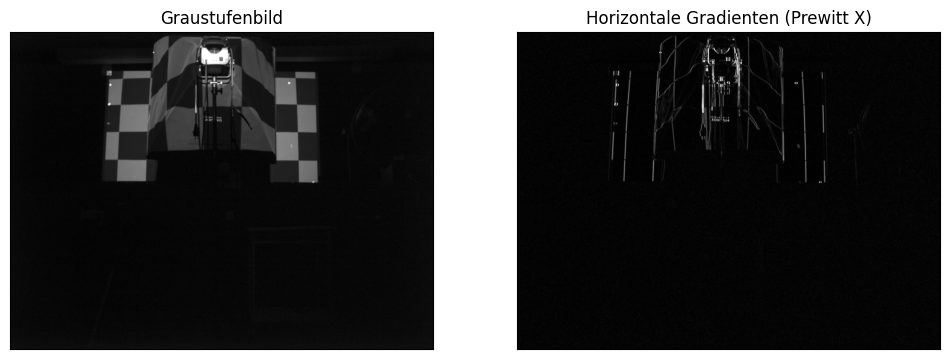

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bild einlesen
img = cv2.imread('Utils/Images/01_Beamer_erster_Versuch/01_links/links4.bmp')

# Überprüfen, ob das Bild korrekt eingelesen wurde
if img is None:
    raise FileNotFoundError("Das Bild konnte nicht geladen werden. Bitte überprüfen Sie den Pfad.")

# Bild in Graustufen umwandeln
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Prewitt-Filter für horizontale Richtung definieren
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# Horizontalen Prewitt-Filter anwenden
grad_x = cv2.filter2D(gray, cv2.CV_64F, prewitt_kernel_x)

# Betrag der horizontalen Gradienten berechnen
abs_grad_x = np.abs(grad_x)

# Optional: Ausgabe als Bild zur Überprüfung
abs_grad_x_img = cv2.convertScaleAbs(abs_grad_x)
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(gray, cmap='gray')
plt.title('Graustufenbild'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(abs_grad_x_img, cmap='gray')
plt.title('Horizontale Gradienten (Prewitt X)'), plt.xticks([]), plt.yticks([])


# Horizontale Gradienten als numerische Werte ausgeben
print("Horizontale Gradienten (Prewitt X):")
print(abs_grad_x)

# Beispiel: Durchschnittliche Änderung pro Zeile
average_change_per_row = np.mean(abs_grad_x, axis=1)
print("\nDurchschnittliche horizontale Änderung pro Zeile:")
print(average_change_per_row)

# Beispiel: Durchschnittliche Änderung pro Spalte
average_change_per_column = np.mean(abs_grad_x, axis=0)
print("\nDurchschnittliche horizontale Änderung pro Spalte:")
print(average_change_per_column)
plt.show()